In [1]:
import numpy as np
import pyResconstruct 
import pyFigure 



In [2]:
# pyFigure.usePaperStyle

## Reconstruct Data

In [3]:
caseDir='/home/anoldfriend/OpenFOAM/anoldfriend-7/applications/solvers/cokeCombustionFoam/SegregatedSteps/runs/complicatedPorousMedia/combustions/medium/convectionLimited'
fieldNames=["U","T","p","rho","O2","CO2","eps","coke","cokeRectionRate","Qdot"]
sampleRate=10
workerNum=20
overWrite=False
pyResconstruct.reconstruct_all(caseDir,fieldNames,worker=workerNum,sampleRate=sampleRate,overWrite=overWrite)


sample time names: ['0.01' '0.11' '0.21' '0.31' '0.41' '0.51' '0.61' '0.71' '0.81' '0.91'
 '1.01' '1.11' '1.21' '1.31' '1.41' '1.51' '1.61' '1.71' '1.81' '1.91'
 '2.01' '2.11' '2.21' '2.31' '2.41' '2.51' '2.61' '2.71' '2.81' '2.91'
 '3.01' '3.11' '3.21' '3.31' '3.41' '3.51' '3.61' '3.71' '3.81' '3.91'
 '4.01' '4.11' '4.21' '4.31' '4.41' '4.51' '4.61' '4.71' '4.81' '4.91']
saving folder path: /home/anoldfriend/OpenFOAM/anoldfriend-7/applications/solvers/cokeCombustionFoam/SegregatedSteps/runs/complicatedPorousMedia/combustions/medium/convectionLimited/postProcess
start to map...
Time 0.01: 0.01 result already existsTime 0.11: 0.11 result already existsTime 0.21: 0.21 result already existsTime 0.31: 0.31 result already existsTime 0.41: 0.41 result already existsTime 0.51: 0.51 result already existsTime 0.61: 0.61 result already exists





Time 0.71: 0.71 result already exists
Time 0.81: 0.81 result already existsTime 2.01: 2.01 result already existsTime 0.91: 0.91 result already existsT

'/home/anoldfriend/OpenFOAM/anoldfriend-7/applications/solvers/cokeCombustionFoam/SegregatedSteps/runs/complicatedPorousMedia/combustions/medium/convectionLimited/postProcess'




Time 2.81: 2.81 result already existsTime 2.91: 2.91 result already existsTime 3.01: 3.01 result already existsTime 3.11: 3.11 result already existsTime 3.21: 3.21 result already existsTime 3.31: 3.31 result already exists
Time 3.41: 3.41 result already existsTime 3.51: 3.51 result already existsTime 3.61: 3.61 result already existsTime 3.71: 3.71 result already existsTime 3.81: 3.81 result already existsTime 3.91: 3.91 result already exists
Time 4.11: 4.11 result already existsTime 4.21: 4.21 result already existsTime 4.01: 4.01 result already existsTime 4.31: 4.31 result already existsTime 4.41: 4.41 result already exists
Time 4.51: 4.51 result already exists





Time 4.61: 4.61 result already exists




Time 4.71: 4.71 result already exists





Time 4.81: 4.81 result already existsTime 4.91: 4.91 result already exists





## Plot contours

In [4]:
folder='/home/anoldfriend/OpenFOAM/anoldfriend-7/applications/solvers/cokeCombustionFoam/SegregatedSteps/runs/complicatedPorousMedia/combustions/medium/convectionLimited/postProcess'
df=pyFigure.readData(folder,"2.31")

In [5]:
df.head()

,U_0,U_1,U_2,T,p,rho,O2,CO2,eps,x,y,coke,cokeRectionRate,Qdot
0,1.301180e-10,7.126790e-09,0.0,829.2330,1000340.0,4.264860,0.160980,0.075127,0.01,0.000194,0.000096,0.0,0.0,0.0
1,1.136393e-10,7.156776e-09,0.0,829.2617,1000340.0,4.264900,0.160862,0.075284,0.01,0.000195,0.000096,0.0,0.0,0.0
2,6.955507e-11,7.198250e-09,0.0,829.3047,1000340.0,4.264953,0.160690,0.075511,0.01,0.000196,0.000096,0.0,0.0,0.0
3,5.163260e-11,7.211490e-09,0.0,829.3190,1000340.0,4.264970,0.160634,0.075586,0.01,0.000197,0.000096,0.0,0.0,0.0
4,1.746520e-10,7.123930e-09,0.0,829.2177,1000340.0,4.265320,0.160722,0.075450,0.01,0.000194,0.000097,0.0,0.0,0.0


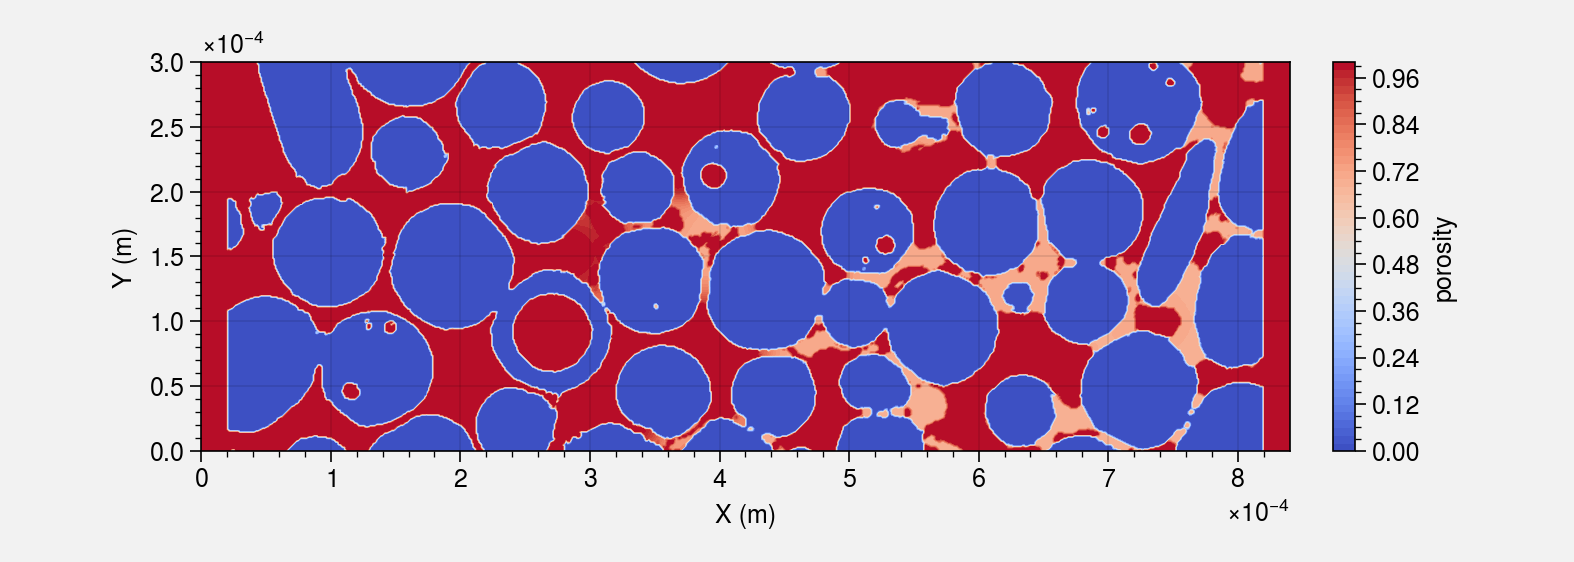

In [6]:
pyFigure.plot_contourf(df,"eps",label='porosity',levels=50)

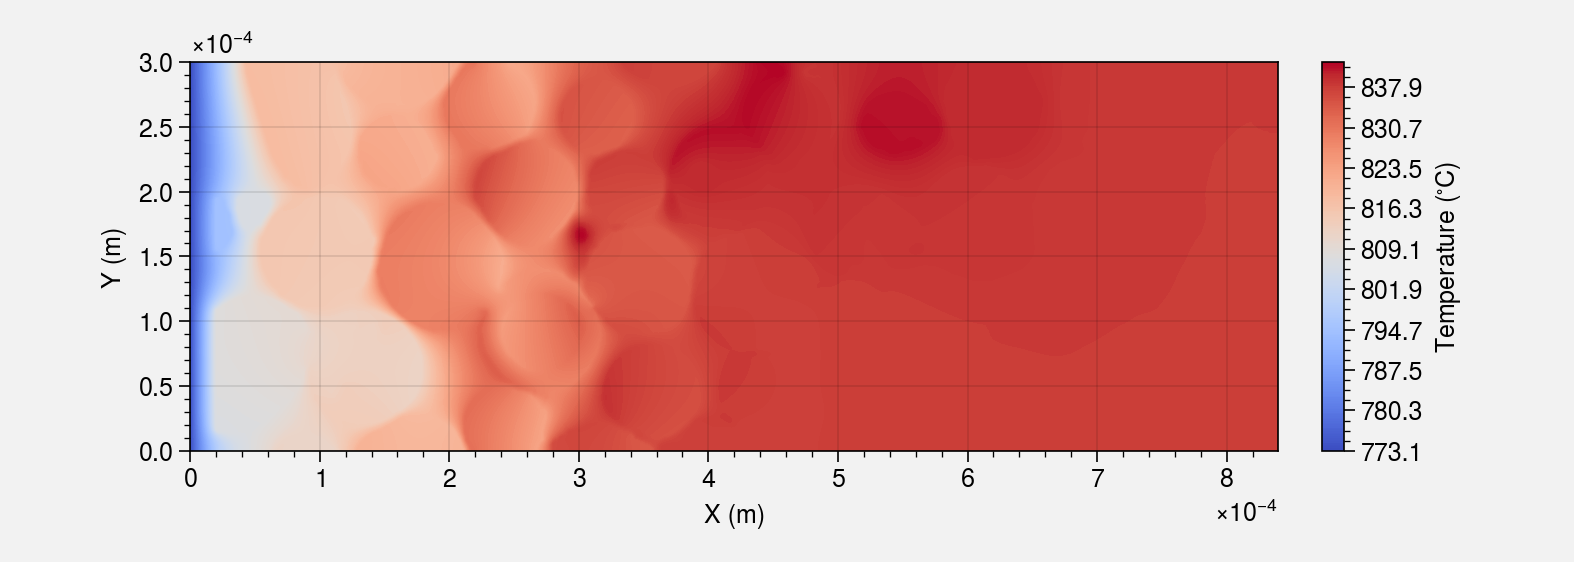

In [7]:
pyFigure.plot_contourf(df,"T",label='Temperature ($^{\circ}$C)')

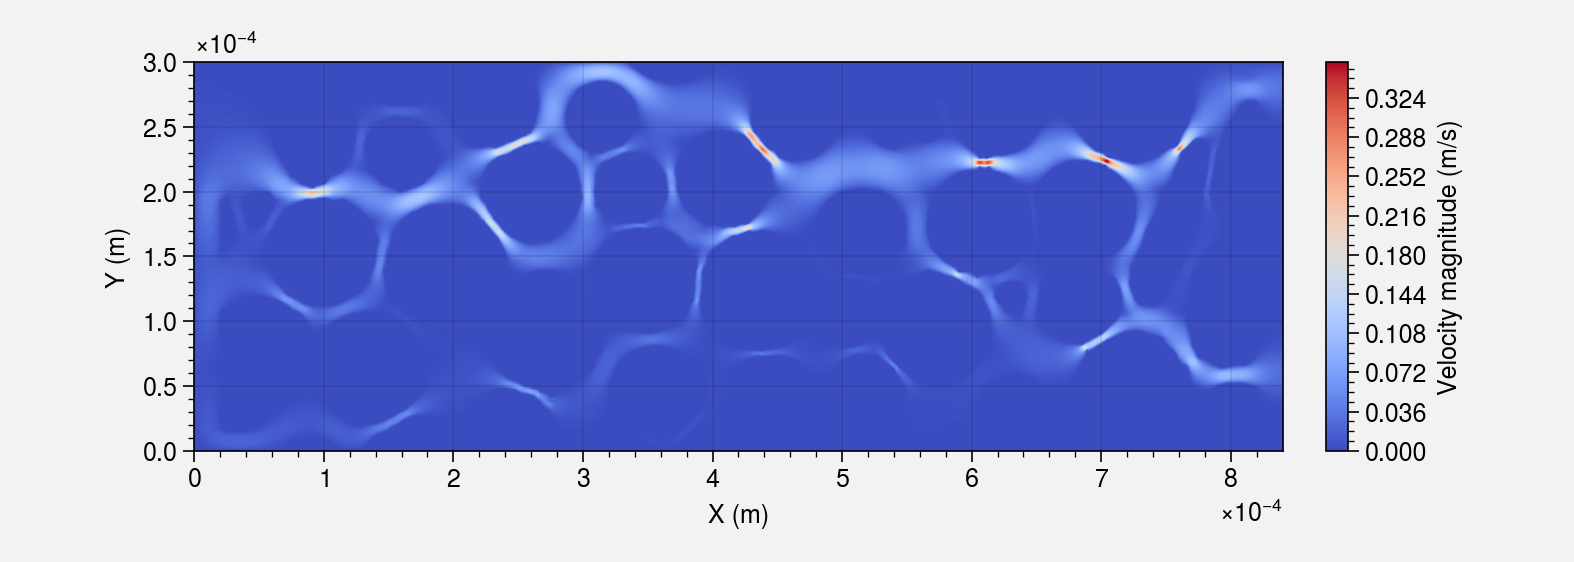

In [8]:
df["UNorm"]=np.sqrt(df['U_0']**2 + df['U_1']**2 + df['U_2']**2)
pyFigure.plot_contourf(df,"UNorm",label='Velocity magnitude (m/s)',levels=250)

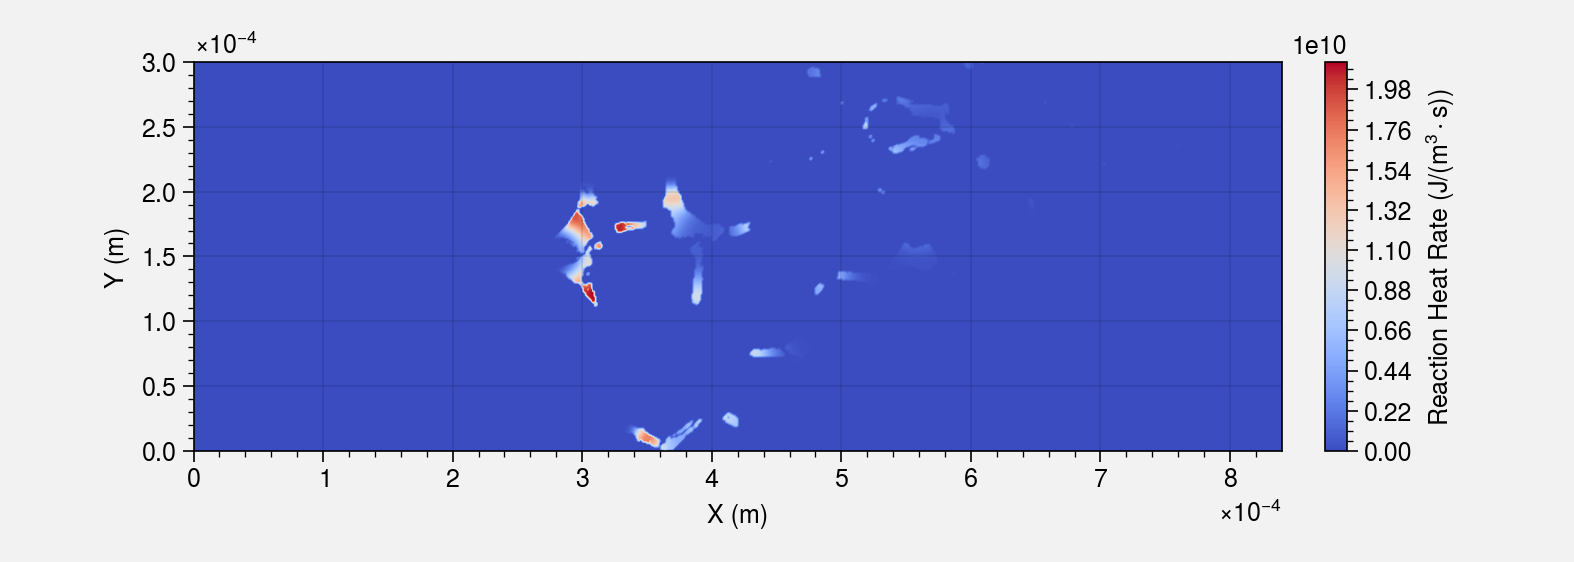

In [9]:
pyFigure.plot_contourf(df,"Qdot",label='Reaction Heat Rate (J/(m$^3\cdot$s))')

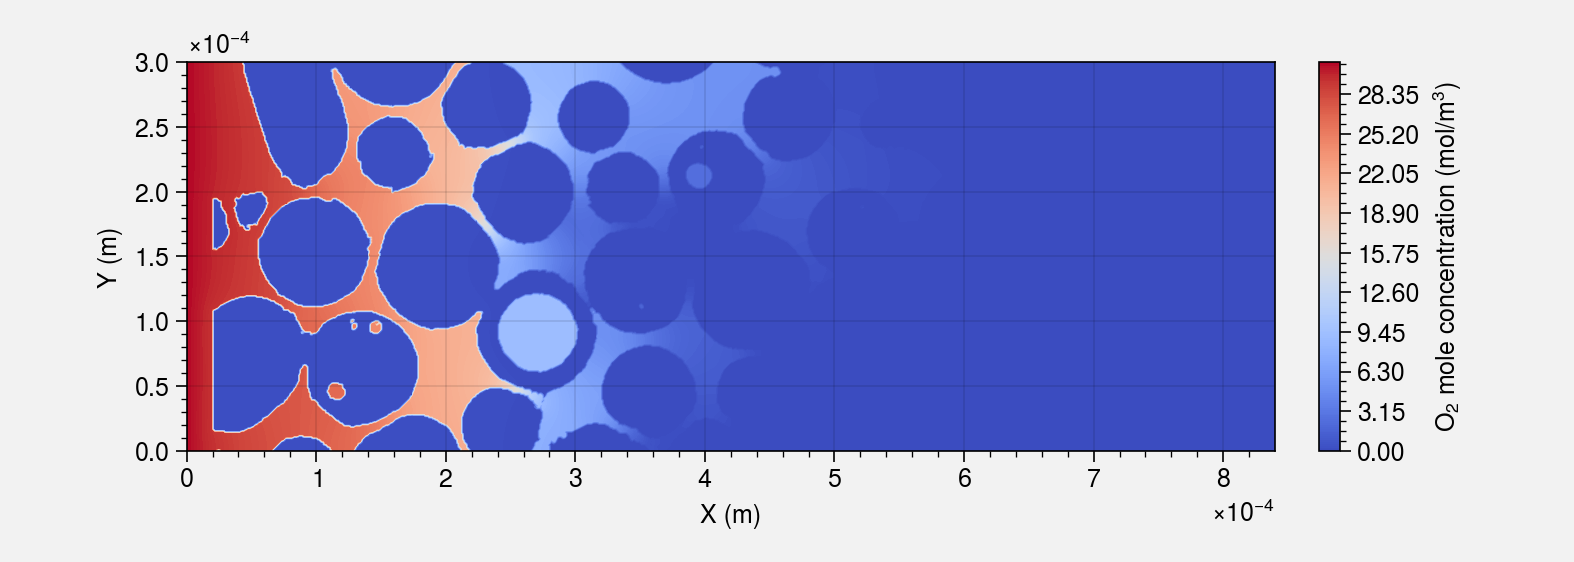

In [10]:
MO2=0.032 #g/mol
df["O2Conc"]=df['rho']*df['eps']*df['O2']/MO2
pyFigure.plot_contourf(df,"O2Conc",label='O$_2$ mole concentration (mol/m$^3$)')

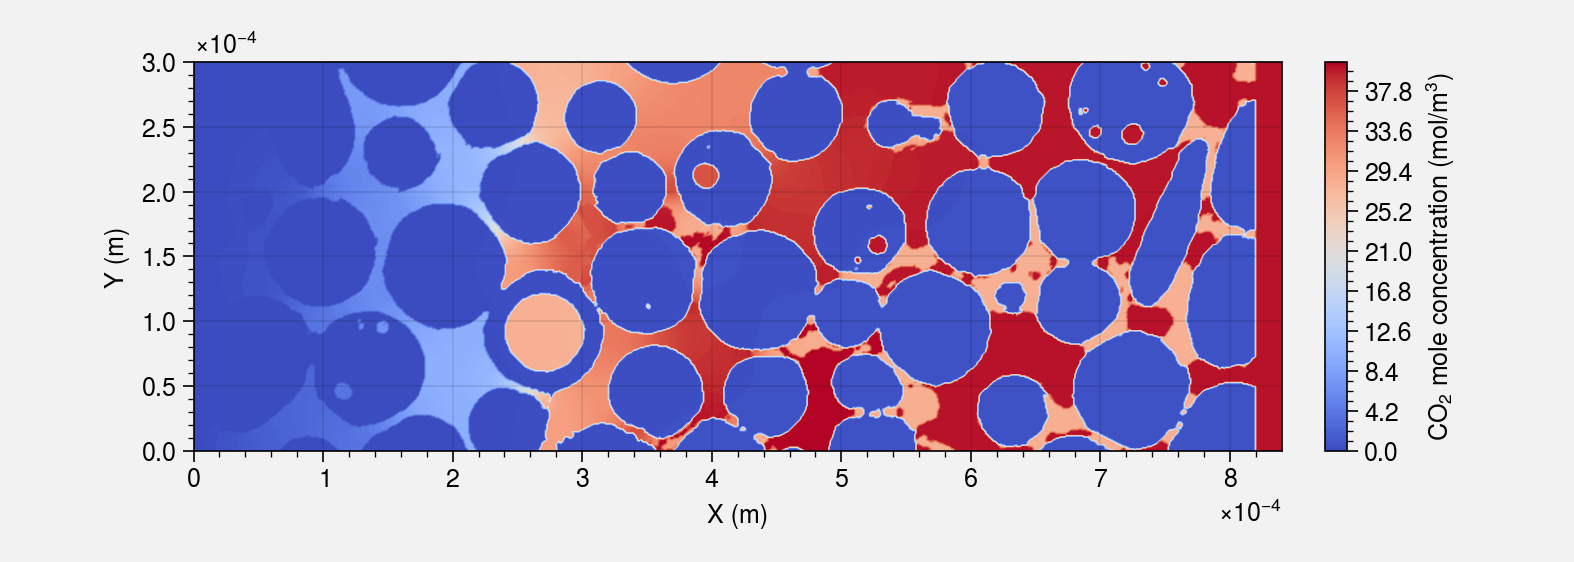

In [11]:
MCO2=0.044 #g/mol
df["CO2Conc"]=df['rho']*df['eps']*df['CO2']/MO2
pyFigure.plot_contourf(df,"CO2Conc",label='CO$_2$ mole concentration (mol/m$^3$)',figwidth=20)

## Analyze profiles

In [12]:
dataFolder='/home/anoldfriend/OpenFOAM/anoldfriend-7/applications/solvers/cokeCombustionFoam/SegregatedSteps/runs/complicatedPorousMedia/combustions/medium/convectionLimited/postProcess'


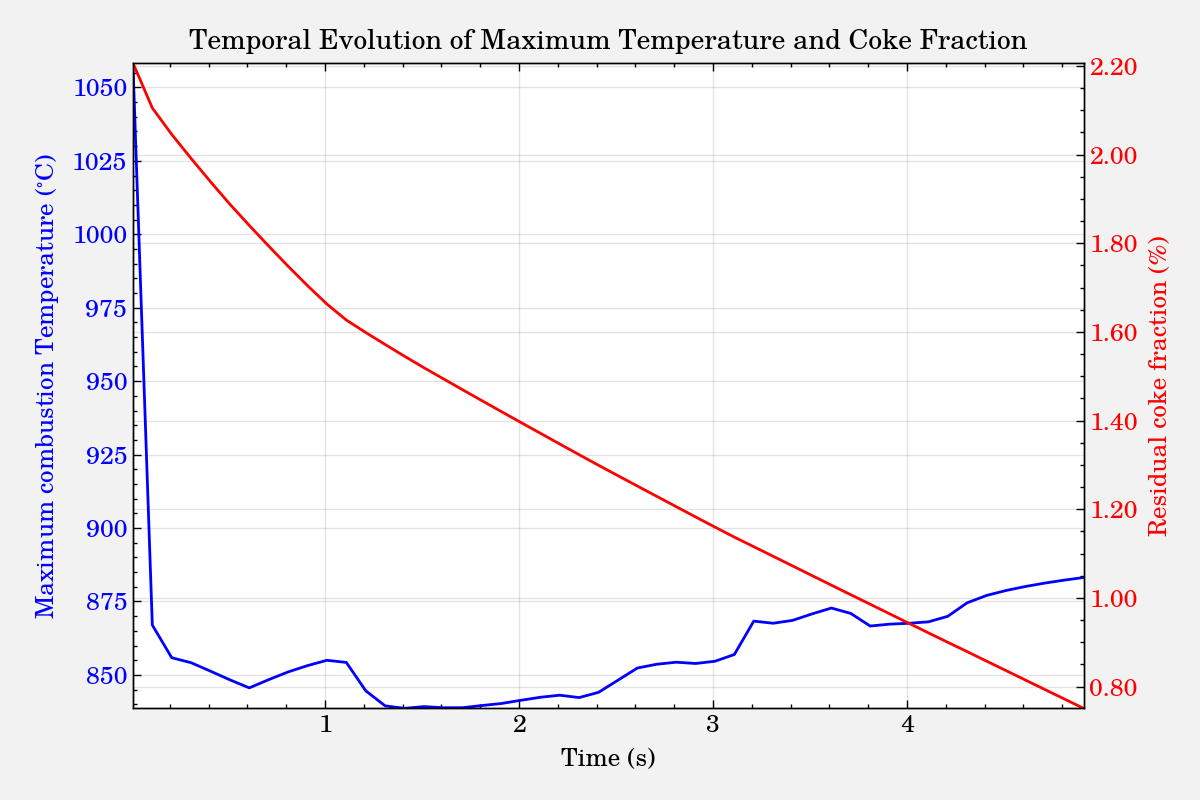

In [13]:
pyFigure.plotTemperatureAndCokeEvolution(dataFolder,workerNum=10)